Predict the price of the Uber ride from a given pickup point to the
agreed drop-off location. Perform following tasks: 
1. Pre-process the dataset. 
2. Identify outliers. 
3. Check the correlation. 
4. Implement linear regression and random forest regression models. 
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('uber.csv')

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.shape

(200000, 9)

In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [10]:
df.drop(['Unnamed: 0', 'key', ], axis=1, inplace=True)

In [11]:
df.shape

(199999, 7)

In [12]:
df.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1


In [13]:
for col in df.columns:
    print(col, ":", df[col].unique())

fare_amount : [ 7.5   7.7  12.9  ... 37.2  86.25 89.1 ]
pickup_datetime : ['2015-05-07 19:52:06 UTC' '2009-07-17 20:04:56 UTC'
 '2009-08-24 21:45:00 UTC' ... '2009-06-29 00:42:00 UTC'
 '2015-05-20 14:56:25 UTC' '2010-05-15 04:08:00 UTC']
pickup_longitude : [-73.99981689 -73.994355   -74.005043   ... -73.969204   -74.003548
 -73.99712372]
pickup_latitude : [40.73835373 40.728225   40.74077    ... 40.74391937 40.72121
 40.72545242]
dropoff_longitude : [-73.99951172 -73.99471    -73.962565   ... -73.95223999 -74.01390839
 -73.858957  ]
dropoff_latitude : [40.72321701 40.750325   40.772647   ... 40.692588   40.6954155
 40.768793  ]
passenger_count : [  1   3   5   2   4   6   0 208]


################

In [14]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).dt.time

In [15]:
df['pickup_hour'] = df['pickup_datetime'].astype(str).str[:2].astype(int)


In [16]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour
0,7.5,19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,19
1,7.7,20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,20
2,12.9,21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,21
3,5.3,08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,8
4,16.0,17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,17


In [17]:
df.drop('pickup_datetime', inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   pickup_hour        199999 non-null  int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 11.4 MB


In [18]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_hour'],
      dtype='object')

In [19]:
col = df.pop('fare_amount')
df['fare_amount'] = col

In [20]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,fare_amount
0,-73.999817,40.738354,-73.999512,40.723217,1,19,7.5
1,-73.994355,40.728225,-73.994710,40.750325,1,20,7.7
2,-74.005043,40.740770,-73.962565,40.772647,1,21,12.9
3,-73.976124,40.790844,-73.965316,40.803349,3,8,5.3
4,-73.925023,40.744085,-73.973082,40.761247,5,17,16.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   199999 non-null  float64
 1   pickup_latitude    199999 non-null  float64
 2   dropoff_longitude  199999 non-null  float64
 3   dropoff_latitude   199999 non-null  float64
 4   passenger_count    199999 non-null  int64  
 5   pickup_hour        199999 non-null  int32  
 6   fare_amount        199999 non-null  float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 11.4 MB


# Graphs

In [22]:
df.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_hour', 'fare_amount'],
      dtype='object')

In [23]:
num_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'fare_amount']

C:\TEMP\ipykernel_3320\372850670.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[num_cols], labels=num_cols)


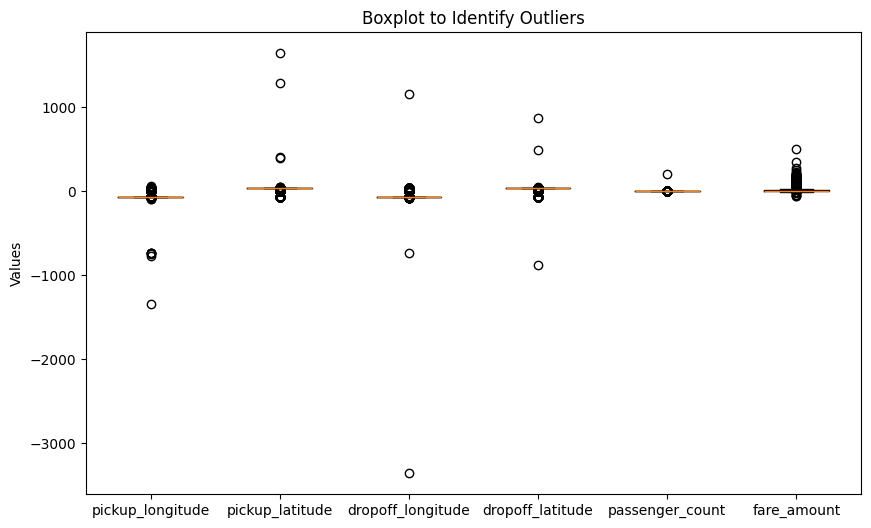

In [45]:
# df[num_cols].boxplot(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.boxplot(df[num_cols], labels=num_cols)
plt.title("Boxplot to Identify Outliers")
plt.ylabel("Values")
plt.show()

### Correlation Heatmap

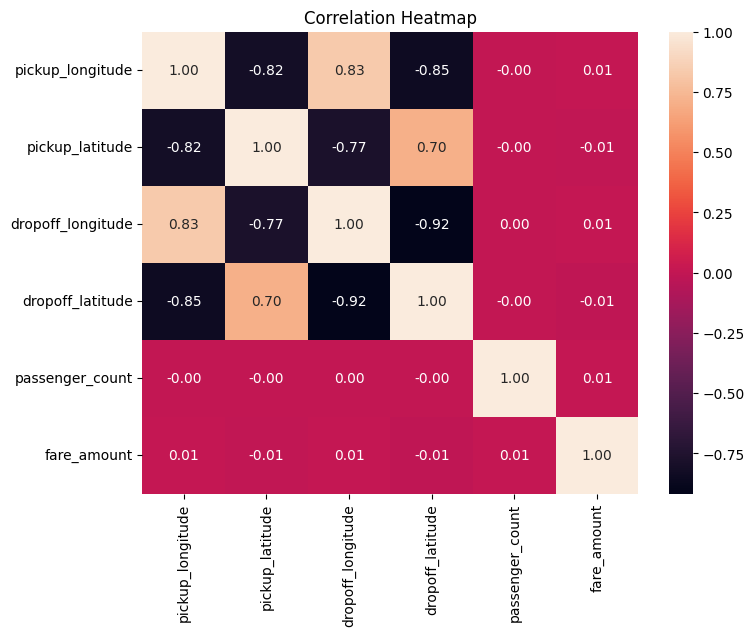

In [25]:
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# X and y


In [26]:
X = df.drop('fare_amount', axis = 1)
y = df['fare_amount']

In [27]:
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour
0,-73.999817,40.738354,-73.999512,40.723217,1,19
1,-73.994355,40.728225,-73.994710,40.750325,1,20
2,-74.005043,40.740770,-73.962565,40.772647,1,21
3,-73.976124,40.790844,-73.965316,40.803349,3,8
4,-73.925023,40.744085,-73.973082,40.761247,5,17
...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1,10
199996,-73.984722,40.736837,-74.006672,40.739620,1,1
199997,-73.986017,40.756487,-73.858957,40.692588,2,0
199998,-73.997124,40.725452,-73.983215,40.695415,1,14


In [28]:
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199999, dtype: float64

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (159999, 6)
Testing data shape: (40000, 6)


In [34]:
X_train

array([[-0.12806476,  0.10333281, -0.10748269,  0.11866164, -0.48742328,
         1.3071289 ],
       [-0.12954074,  0.10091712, -0.10782511,  0.11677964, -0.48742328,
         1.15370658],
       [-0.12814473,  0.10475455, -0.10695049,  0.1238506 ,  0.93623406,
        -0.53393888],
       ...,
       [-0.12797902,  0.09741308, -0.1045953 ,  0.11292571, -0.48742328,
        -1.45447277],
       [-0.12811156,  0.10210743, -0.10704883,  0.12103777, -0.48742328,
        -0.6873612 ],
       [-0.12829063,  0.101517  , -0.10014851,  0.1326266 , -0.48742328,
         1.15370658]])

In [35]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,fare_amount
0,-73.999817,40.738354,-73.999512,40.723217,1,19,7.5
1,-73.994355,40.728225,-73.994710,40.750325,1,20,7.7
2,-74.005043,40.740770,-73.962565,40.772647,1,21,12.9
3,-73.976124,40.790844,-73.965316,40.803349,3,8,5.3
4,-73.925023,40.744085,-73.973082,40.761247,5,17,16.0


# Model Training

1) Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [37]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = lr_model.predict(X_test)

In [39]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression Results:")
print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae:.4f}")

Linear Regression Results:
R² Score: 0.0008509459434238309
RMSE: 10.19487201301652
MAE: 6.0646


2. Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [42]:
y_pred_rf = rf_model.predict(X_test)


In [43]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [44]:
print("\nRandom Forest (Unscaled Data):")
print(f"R²: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")


Random Forest (Unscaled Data):
R²: 0.7037
RMSE: 5.5517
MAE: 2.2510
